<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/Advanced_ML_SM_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/master/Module%2008%20-%20%20Advanced%20ML%20-%20Supervised%20Models/data/Orange_Telecom_Churn_Data.csv")

In [2]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

In [0]:
# Drop columns that are not going to be used for the prediction
data.drop(['state', 'phone_number', 'area_code'],axis=1, inplace=True)

### **Data Preprocessing**

In [6]:
for col in ['intl_plan', 'voice_mail_plan']:
  data[col] = data[col].replace('yes', 'True').replace('no', 'False').astype(np.bool)

data[['intl_plan', 'voice_mail_plan']].dtypes

intl_plan          bool
voice_mail_plan    bool
dtype: object

In [12]:
# data.groupby('intl_plan').count()
data.groupby('voice_mail_plan').count()

,account_length,intl_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
voice_mail_plan,,,,,,,,,,,,,,,,,
True,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [13]:
# Examine distribution of the predicted variable
# Check if out data is imbalanced
data.churned.value_counts()

False    4293
True      707
Name: churned, dtype: int64

In [14]:
data.churned.value_counts(normalize=True)

False    0.8586
True     0.1414
Name: churned, dtype: float64

In [0]:
"""
Two ways of shuffling the data into a test and train set maintaining the proportion of the predicted
variable in both.
"""
### 1 ###
# feature_cols = [x for x in data.columns if x != 'churned']

# # Split the data into two parts with 1500 points in the test data
# # This creates a generator
# strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

# # Get the index values from the generator
# train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['churned']))

# # Create the data sets
# X_train = data.loc[train_idx, feature_cols]
# y_train = data.loc[train_idx, 'churned']

# X_test = data.loc[test_idx, feature_cols]
# y_test = data.loc[test_idx, 'churned']

#### 2 ####

# Separate the test and train data maintaining the proportion of the labels in the two sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['churned'],axis=1), data['churned'], test_size=0.3, stratify=data.churned, random_state=42)


In [0]:
# Suppress warnings about too few trees from the early models

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
rf = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    rf.set_params(n_estimators=n_trees)

    # Fit the model
    rf.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - rf.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.092286
20.0,0.084857
30.0,0.080857
40.0,0.077429
50.0,0.077714
100.0,0.072857
150.0,0.072571
200.0,0.073143
300.0,0.072000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

[Text(0, 0.5, 'out-of-bag error')]

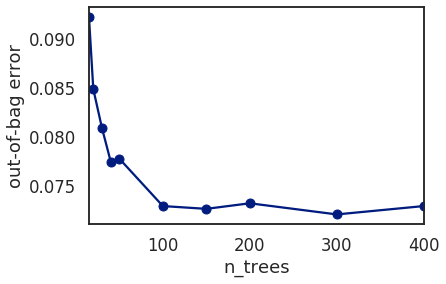

In [20]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error')

In [21]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=True)